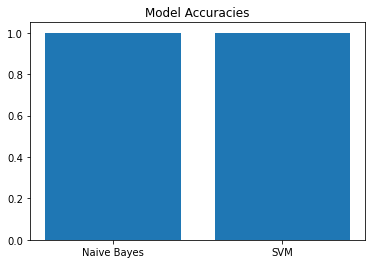

Naive Bayes Accuracy: 1.000
SVM Accuracy: 1.000


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('speech_emotions.csv')

# Text preprocessing
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: x.strip())

# Define emotion labels
emotion_dict = {
    'happy': ['eager', 'fascinated', 'victory'],
    'sad': ['tension', 'grief'], 
    'fearful': ['suspense'],
    'angry': ['furious'],
}

def deduce_emotion(text):
    for emotion, keywords in emotion_dict.items():
        for word in keywords:
            if word in text:
                return emotion
    return 'neutral'

df['emotion'] = df['text'].apply(lambda x : deduce_emotion(x))

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['emotion']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Train models
nb = MultinomialNB()
nb.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

# Evaluate models
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)
svm_acc = accuracy_score(y_test, svm_pred)

# Plot result  
models = ['Naive Bayes', 'SVM']
accuracy = [nb_acc, svm_acc]

fig, ax = plt.subplots() 
ax.bar(models, accuracy)
ax.set_title("Model Accuracies")
plt.show()

print(f'Naive Bayes Accuracy: {nb_acc:.3f}')
print(f'SVM Accuracy: {svm_acc:.3f}')